In [1]:
!nvidia-smi

Sat Aug 10 20:47:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [5]:
!yolo obb train model=yolov8n-obb.pt data='/content/drive/MyDrive/YOLO Court Detection/court_custom.yaml' epochs=20 imgsz=864


100% 6.26M/6.26M [00:00<00:00, 83.4MB/s]
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/drive/MyDrive/YOLO Court Detection/court_custom.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=864, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

In [6]:
model = YOLO('/content/runs/obb/train/weights/best.pt')
model.export(format='onnx', dynamic=True)

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs

PyTorch: starting from '/content/runs/obb/train/weights/best.pt' with input shape (1, 3, 864, 864) BCHW and output shape(s) (1, 6, 15309) (6.4 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 306.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 8.5s, saved as '/content/runs/obb/train/weights/best.onnx' (11.8 MB)

Export complete (10.8s)
Results saved to /content/runs/obb/train/weights
Predict:         yolo predict task=obb model=/content/runs/obb/train/weights/best.onnx imgsz=864  
Validate:        yolo val task=obb 

'/content/runs/obb/train/weights/best.onnx'

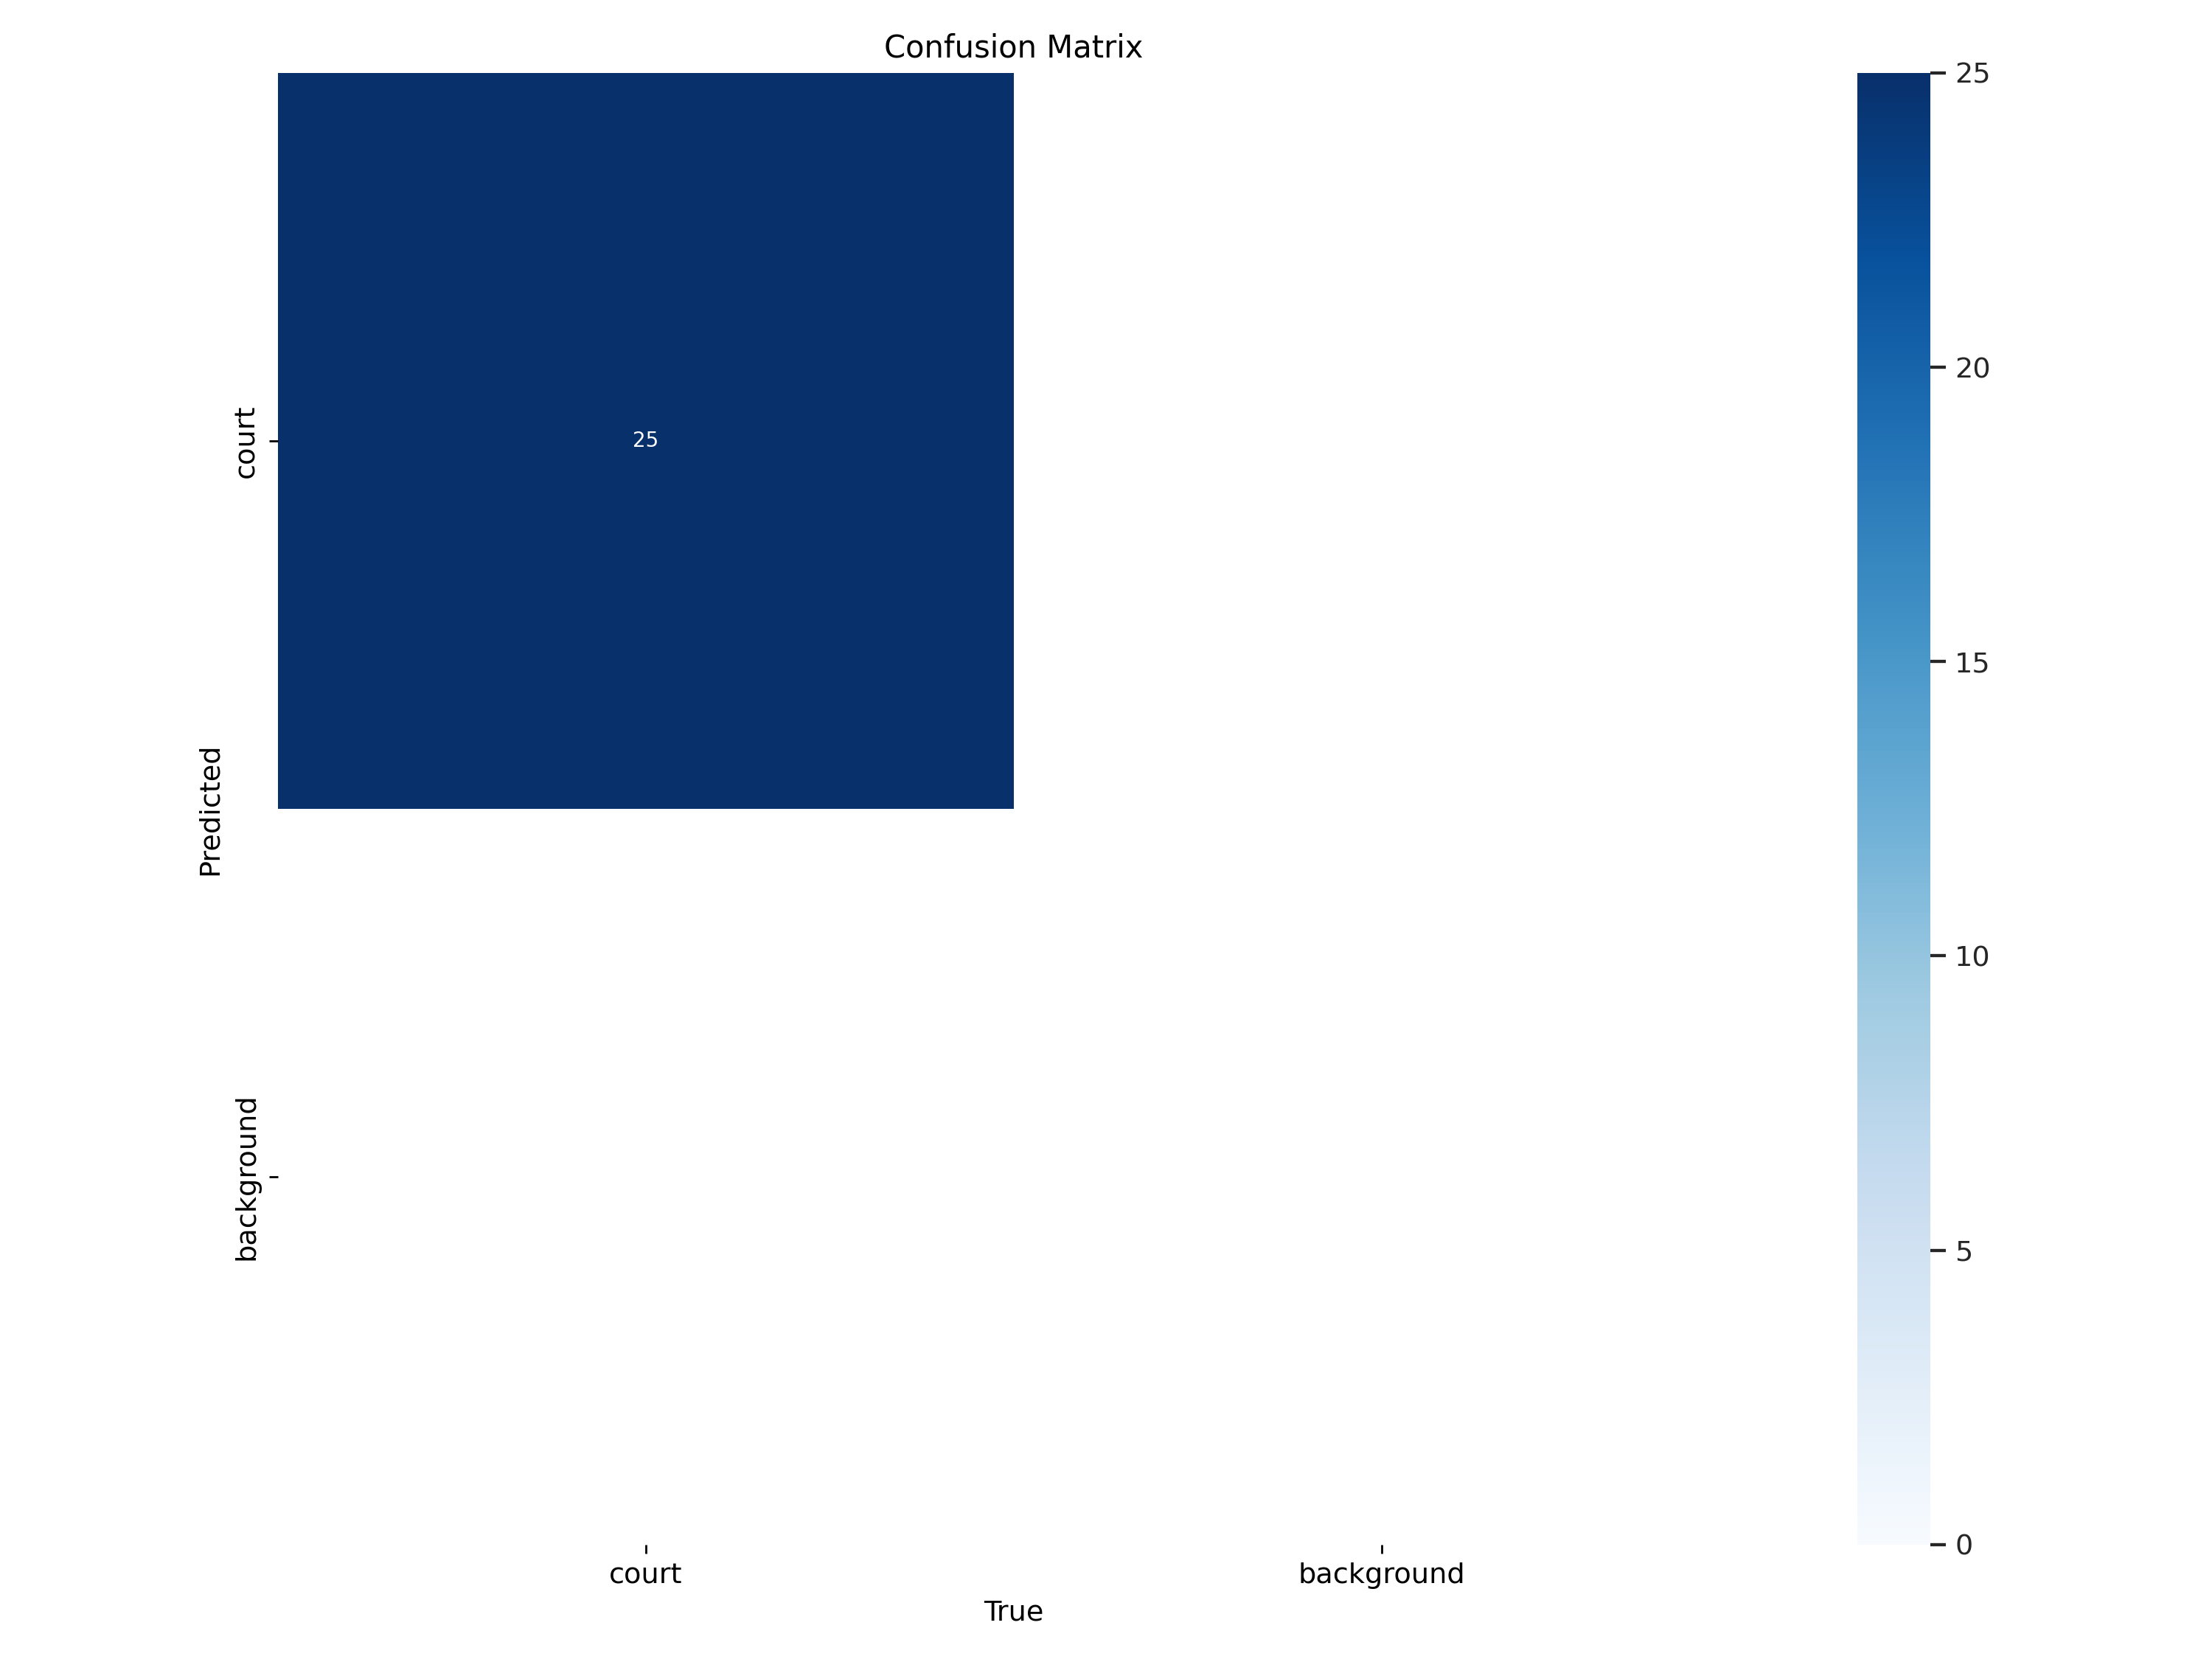

In [7]:
Image(filename=f'/content/runs/obb/train/confusion_matrix.png', width=800)

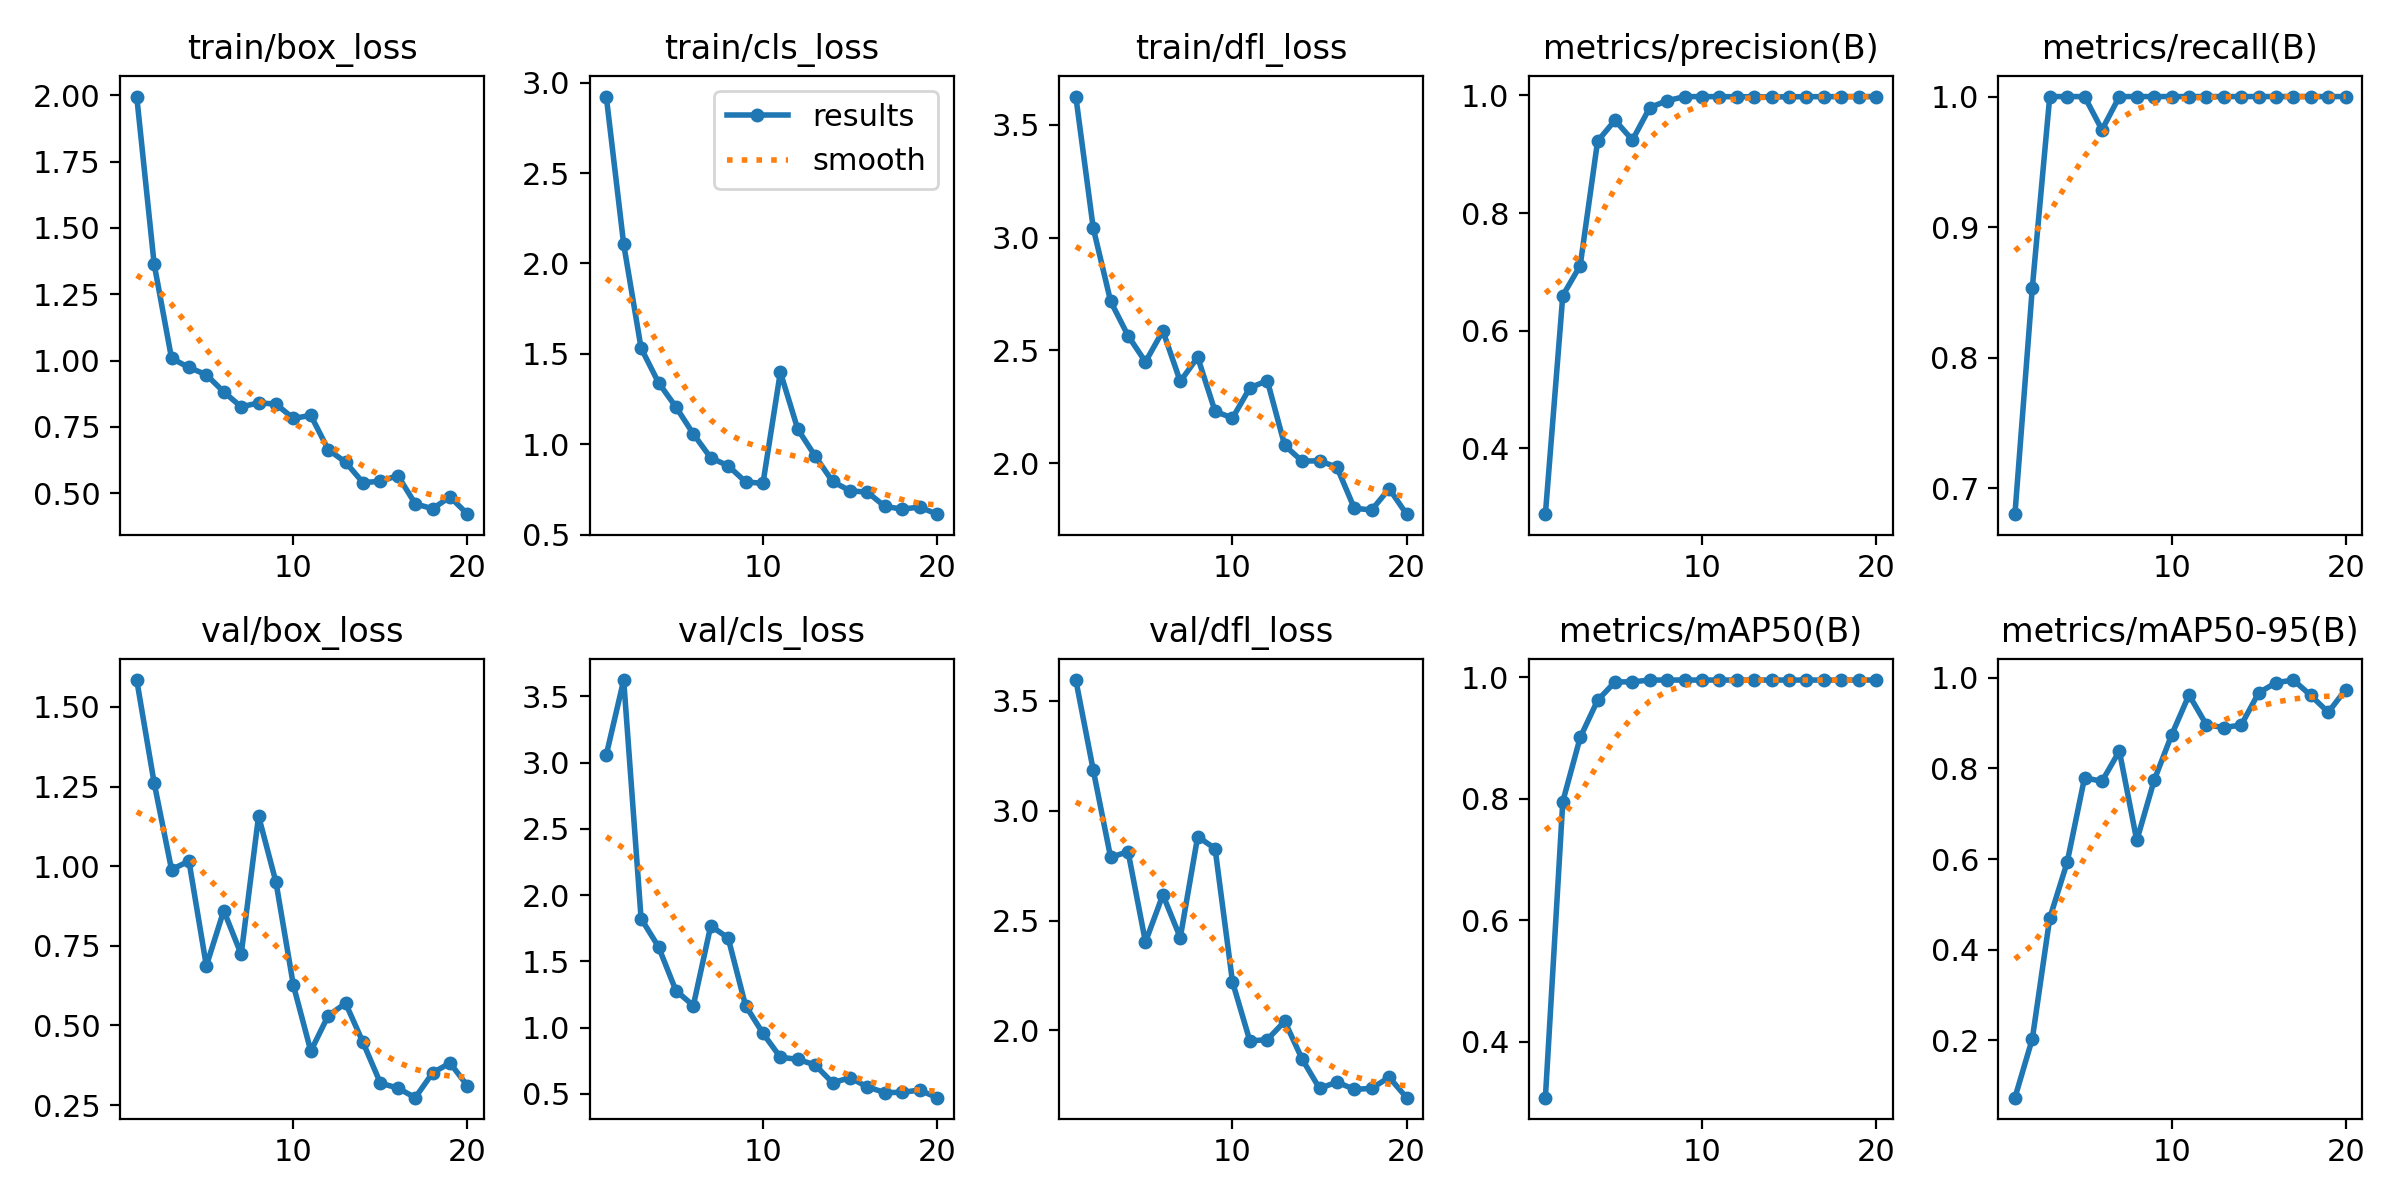

In [8]:
Image(filename=f'/content/runs/obb/train/results.png', width=1000)

In [9]:
!yolo obb val model='/content/runs/obb/train/weights/best.pt' data='/content/drive/MyDrive/YOLO Court Detection/court_custom.yaml'

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO Court Detection/court-lines-data/val/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:13<00:00,  6.97s/it]
                   all         25         25      0.998          1      0.995      0.995
Speed: 8.6ms preprocess, 315.0ms inference, 0.0ms loss, 19.3ms postprocess per image
Results saved to runs/obb/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
!zip -r obb.zip runs

# Import the files module from google.colab
from google.colab import files

# Download the zipped folder
files.download('obb.zip')

  adding: runs/ (stored 0%)
  adding: runs/obb/ (stored 0%)
  adding: runs/obb/train/ (stored 0%)
  adding: runs/obb/train/val_batch1_labels.jpg (deflated 5%)
  adding: runs/obb/train/events.out.tfevents.1723322952.52e9a7f59cab.1082.0 (deflated 91%)
  adding: runs/obb/train/weights/ (stored 0%)
  adding: runs/obb/train/weights/best.pt (deflated 10%)
  adding: runs/obb/train/weights/best.onnx (deflated 13%)
  adding: runs/obb/train/weights/last.pt (deflated 10%)
  adding: runs/obb/train/args.yaml (deflated 51%)
  adding: runs/obb/train/results.png (deflated 7%)
  adding: runs/obb/train/train_batch0.jpg (deflated 2%)
  adding: runs/obb/train/F1_curve.png (deflated 20%)
  adding: runs/obb/train/confusion_matrix_normalized.png (deflated 41%)
  adding: runs/obb/train/R_curve.png (deflated 25%)
  adding: runs/obb/train/results.csv (deflated 84%)
  adding: runs/obb/train/labels_correlogram.jpg (deflated 59%)
  adding: runs/obb/train/train_batch70.jpg (deflated 6%)
  adding: runs/obb/train/PR_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>